# Dependencies

In [2]:
import torch
#!git clone https://github.com/ultralytics/yolov5

In [3]:
#!pip install matplotlib numpy pandas Pillow opencv-python tqdm seaborn tensorboard

In [4]:
#!cd yolov5 & pip install -r requirements.txt

In [3]:
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] =(20,10)

# Load Model

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s') # s for small

Using cache found in C:\Users\admin/.cache\torch\hub\ultralytics_yolov5_master
C:\Users\admin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
requirements: scipy>=1.4.1 not found and is required by YOLOv5, attempting auto-update...

requirements: seaborn>=0.11.0 not found and is required by YOLOv5, attempting auto-update...

requirements: 2 packages updated per C:\Users\admin\.cache\torch\hub\ultralytics_yolov5_master\requirements.txt
requirements:  Restart runtime or rerun command for updates to take effect

YOLOv5  2022-7-24 Python-3.8.8 torch-1.11.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [7]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

# Make Detection

In [8]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [9]:
result = model(img)
result.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 788.0ms pre-process, 234.4ms inference, 0.0ms NMS per image at shape (1, 3, 384, 640)


In [10]:
result.show()

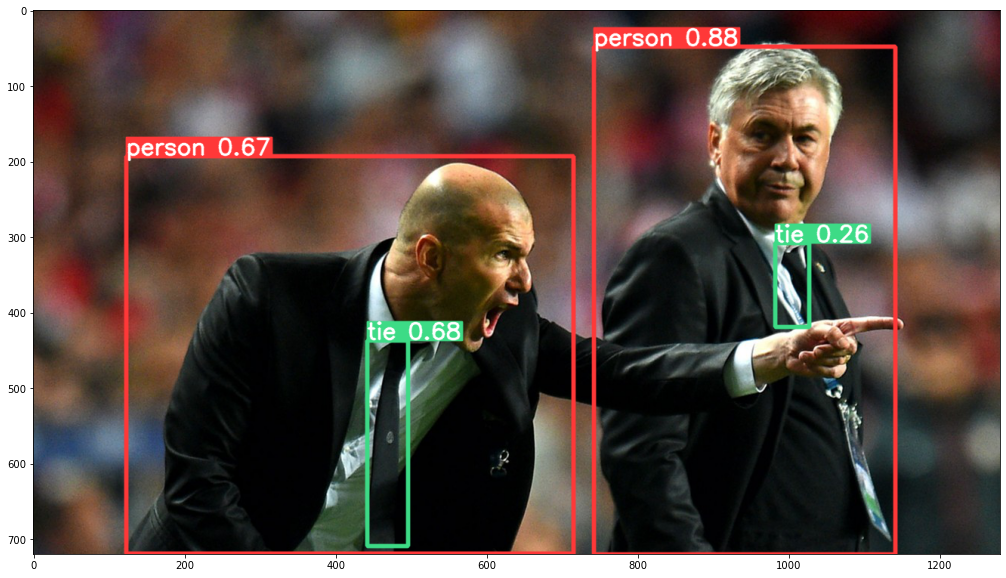

In [11]:
%matplotlib inline
plt.rcParams['figure.figsize'] =(20,10)
plt.imshow(np.squeeze(result.render()))
plt.show()

In [13]:
dir(result)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'crop',
 'display',
 'files',
 'imgs',
 'n',
 'names',
 'pandas',
 'pred',
 'print',
 'render',
 's',
 'save',
 'show',
 't',
 'times',
 'tolist',
 'xywh',
 'xywhn',
 'xyxy',
 'xyxyn']

In [14]:
result.render()[0].shape

(720, 1280, 3)

In [15]:
img2= 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg?20190503075536'

In [16]:
result2 = model(img2)

In [17]:
result2.print()

image 1/1: 533x800 28 cars, 5 trucks
Speed: 1579.8ms pre-process, 349.2ms inference, 2.0ms NMS per image at shape (1, 3, 448, 640)


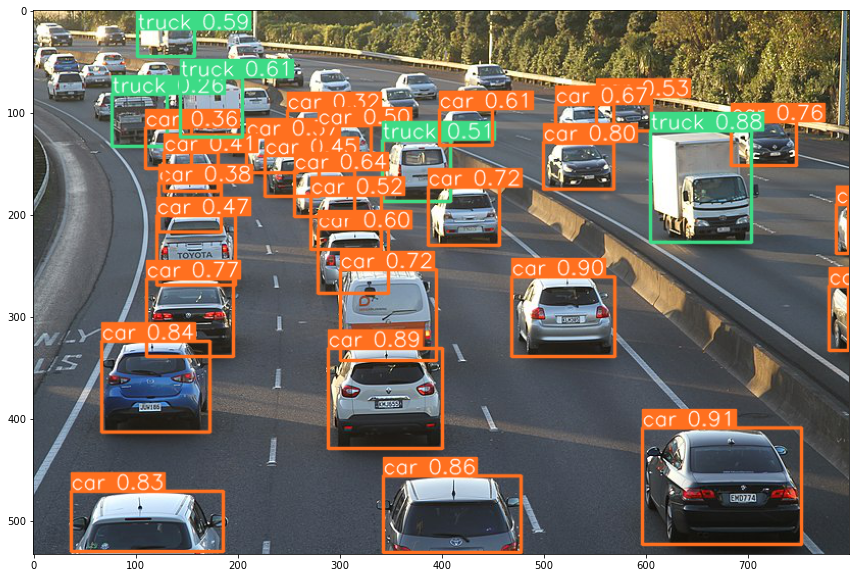

In [18]:
plt.imshow(result2.render()[0])

# Real Time Detections

In [25]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)
    result = model(frame)
    frame = np.squeeze(result.render())
    cv2.imshow("Yolo",frame)
    
    if(cv2.waitKey(10) & 0xFF == ord('q')): break
        
        
cap.release()
cv2.destroyAllWindows()
    

# Train From Scratch

In [27]:
import uuid
import os
import time

In [39]:
IMAGES_PATH = os.path.join("datadrowsy",'images')
labels = ['awake','drowsy']
number_imgs = 20

In [42]:
cap = cv2.VideoCapture(0)
"""while cap.isOpened():
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)
    result = model(frame)
    frame = np.squeeze(result.render())
    cv2.imshow("Yolo",frame)
    
    if(cv2.waitKey(10) & 0xFF == ord('q')): break
        
        
cap.release()
cv2.destroyAllWindows()"""

for label in labels:
    print(f"Collecting images for {label}")
    time.sleep(5)
    for i in range(number_imgs):
        print(f"Collecting images for {label} - {i+1}")
        res, frame = cap.read()
        imgname = os.path.join(IMAGES_PATH,label+'_'+str(uuid.uuid1())+".jpg")
        cv2.imwrite(imgname,frame)
        cv2.imshow("Image",frame)
        time.sleep(2)
        if(cv2.waitKey(10) & 0xFF == ord('q')): break
        
        
cap.release()
cv2.destroyAllWindows()

In [35]:
for label in labels:
    print(f"Collecting images for {label}")
    #time.sleep(5)
    for i in range(number_imgs):
        print(f"Collecting images for {label} - {i+1}")
        #res, frame = cap.read()
        imgname = os.path.join(IMAGES_PATH,label+'_'+str(uuid.uuid1())+".jpg")
        print(imgname)

data_drowsyness\images\awake_ef8e027b-0b3b-11ed-a205-8c1645570e4a.jpg
data_drowsyness\images\awake_ef8e29cc-0b3b-11ed-bb96-8c1645570e4a.jpg
data_drowsyness\images\awake_ef8e5097-0b3b-11ed-9022-8c1645570e4a.jpg
data_drowsyness\images\awake_ef8e5098-0b3b-11ed-a2fd-8c1645570e4a.jpg
data_drowsyness\images\awake_ef8e77bb-0b3b-11ed-b820-8c1645570e4a.jpg
data_drowsyness\images\awake_ef8e77bc-0b3b-11ed-a791-8c1645570e4a.jpg
data_drowsyness\images\awake_ef8e77bd-0b3b-11ed-9c66-8c1645570e4a.jpg
data_drowsyness\images\awake_ef8e77be-0b3b-11ed-b394-8c1645570e4a.jpg
data_drowsyness\images\awake_ef8e77bf-0b3b-11ed-87e7-8c1645570e4a.jpg
data_drowsyness\images\awake_ef8e77c0-0b3b-11ed-b4be-8c1645570e4a.jpg
data_drowsyness\images\awake_ef8e9ece-0b3b-11ed-956f-8c1645570e4a.jpg
data_drowsyness\images\awake_ef8e9ecf-0b3b-11ed-9947-8c1645570e4a.jpg
data_drowsyness\images\awake_ef8e9ed0-0b3b-11ed-9b94-8c1645570e4a.jpg
data_drowsyness\images\awake_ef8e9ed1-0b3b-11ed-bfa4-8c1645570e4a.jpg
data_drowsyness\imag

In [47]:
!git clone https://github.com/heartexlabs/labelImg.git

Cloning into 'labelImg'...


In [44]:
!pip install pyqt5 lxml --upgrade

     ---------------------------------------- 6.8/6.8 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 3.6/3.6 MB 538.5 kB/s eta 0:00:00
     -------------------------------------- 50.1/50.1 MB 485.3 kB/s eta 0:00:00
     -------------------------------------- 78.1/78.1 kB 160.8 kB/s eta 0:00:00


In [48]:
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

# Training command

In [45]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v6.1-316-g916bdb1 Python-3.8.13 torch-1.12.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1

     7/499        0G   0.07649   0.02445   0.05933        37       320:  33%|###3      | 1/3 [00:10<00:11,  5.67s/it]
     7/499        0G   0.07649   0.02445   0.05933        37       320:  67%|######6   | 2/3 [00:10<00:05,  5.41s/it]
     7/499        0G   0.07458   0.02218   0.05984        13       320:  67%|######6   | 2/3 [00:13<00:05,  5.41s/it]
     7/499        0G   0.07458   0.02218   0.05984        13       320: 100%|##########| 3/3 [00:13<00:00,  4.28s/it]
     7/499        0G   0.07458   0.02218   0.05984        13       320: 100%|##########| 3/3 [00:13<00:00,  4.61s/it]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/2 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  50%|#####     | 1/2 [00:03<00:03,  3.89s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 2/2 [00:04<00:00,  2.16s/it]
               

    56/499        0G   0.06443   0.01501   0.01745        44       320:  67%|######6   | 2/3 [00:11<00:05,  5.66s/it]
    56/499        0G   0.06389   0.01612   0.01725        24       320:  67%|######6   | 2/3 [00:14<00:05,  5.66s/it]
    56/499        0G   0.06389   0.01612   0.01725        24       320: 100%|##########| 3/3 [00:14<00:00,  4.42s/it]
    56/499        0G   0.06389   0.01612   0.01725        24       320: 100%|##########| 3/3 [00:14<00:00,  4.75s/it]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/2 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  50%|#####     | 1/2 [00:03<00:03,  3.53s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 2/2 [00:04<00:00,  2.01s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 2/2 [00:04<00:00,  2.24s/it]


     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/3 [00:00<?, ?it/s]
    72/499        0G   0.05043   0.01509   0.01522        43       320:   0%|          | 0/3 [00:05<?, ?it/s]
    72/499        0G   0.05043   0.01509   0.01522        43       320:  33%|###3      | 1/3 [00:05<00:11,  5.61s/it]
    72/499        0G   0.05104   0.01429    0.0169        38       320:  33%|###3      | 1/3 [00:11<00:11,  5.61s/it]
    72/499        0G   0.05104   0.01429    0.0169        38       320:  67%|######6   | 2/3 [00:11<00:05,  5.61s/it]
    72/499        0G   0.05272   0.01374   0.01603        18       320:  67%|######6   | 2/3 [00:14<00:05,  5.61s/it]
    72/499        0G   0.05272   0.01374   0.01603        18       320: 100%|##########| 3/3 [00:14<00:00,  4.37s/it]
    72/499        0G   0.05272   0.01374   0.01603        18       320: 100%|##########| 3/3 [00:14<00:00,  4.70s/it]

               Class     Images     Labels          P          R     m

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 2/2 [00:04<00:00,  2.17s/it]
                 all         40         40      0.805      0.967      0.974      0.603

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/3 [00:00<?, ?it/s]
   116/499        0G   0.04882   0.01239  0.009835        38       320:   0%|          | 0/3 [00:05<?, ?it/s]
   116/499        0G   0.04882   0.01239  0.009835        38       320:  33%|###3      | 1/3 [00:05<00:11,  5.88s/it]
   116/499        0G   0.04745   0.01208   0.01344        35       320:  33%|###3      | 1/3 [00:11<00:11,  5.88s/it]
   116/499        0G   0.04745   0.01208   0.01344        35       320:  67%|######6   | 2/3 [00:11<00:05,  5.74s/it]
   116/499        0G   0.04623   0.01183   0.01179        17       320:  67%|######6   | 2/3 [00:14<00:05,  5.74s/it]
   116/499        0G   0.04623   0.01183   0.01179        17       320: 100%|#########

   129/499        0G   0.05175   0.01308    0.0109        41       320:  33%|###3      | 1/3 [00:15<00:16,  8.11s/it]
   129/499        0G   0.05175   0.01308    0.0109        41       320:  67%|######6   | 2/3 [00:15<00:07,  7.58s/it]
   129/499        0G   0.05004   0.01354    0.0103        22       320:  67%|######6   | 2/3 [00:19<00:07,  7.58s/it]
   129/499        0G   0.05004   0.01354    0.0103        22       320: 100%|##########| 3/3 [00:19<00:00,  5.85s/it]
   129/499        0G   0.05004   0.01354    0.0103        22       320: 100%|##########| 3/3 [00:19<00:00,  6.37s/it]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/2 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  50%|#####     | 1/2 [00:04<00:04,  4.66s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 2/2 [00:05<00:00,  2.61s/it]
               


               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/2 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  50%|#####     | 1/2 [00:03<00:03,  3.65s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 2/2 [00:04<00:00,  2.08s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 2/2 [00:04<00:00,  2.32s/it]
                 all         40         40      0.994          1      0.995       0.71

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/3 [00:00<?, ?it/s]
   203/499        0G   0.02675   0.01086  0.007094        35       320:   0%|          | 0/3 [00:05<?, ?it/s]
   203/499        0G   0.02675   0.01086  0.007094        35       320:  33%|###3      | 1/3 [00:05<00:11,  5.92s/it]
   203/499        0G   0.02678   0.01075  0.0


               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/2 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  50%|#####     | 1/2 [00:03<00:03,  3.53s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 2/2 [00:04<00:00,  1.98s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 2/2 [00:04<00:00,  2.22s/it]
                 all         40         40      0.996          1      0.995      0.741

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/3 [00:00<?, ?it/s]
   209/499        0G   0.03348   0.01242  0.007556        42       320:   0%|          | 0/3 [00:06<?, ?it/s]
   209/499        0G   0.03348   0.01242  0.007556        42       320:  33%|###3      | 1/3 [00:06<00:12,  6.01s/it]
   209/499        0G   0.03426   0.01228  0.0


               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/2 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  50%|#####     | 1/2 [00:03<00:03,  3.50s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 2/2 [00:04<00:00,  2.01s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 2/2 [00:04<00:00,  2.24s/it]
                 all         40         40      0.996          1      0.995       0.78

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/3 [00:00<?, ?it/s]
   291/499        0G   0.02762  0.008628   0.01544        35       320:   0%|          | 0/3 [00:06<?, ?it/s]
   291/499        0G   0.02762  0.008628   0.01544        35       320:  33%|###3      | 1/3 [00:06<00:12,  6.17s/it]
   291/499        0G    0.0251  0.009313  0.0

  0%|          | 0/3 [00:00<?, ?it/s]
   349/499        0G    0.0295   0.01217  0.005847        43       320:   0%|          | 0/3 [00:05<?, ?it/s]
   349/499        0G    0.0295   0.01217  0.005847        43       320:  33%|###3      | 1/3 [00:05<00:11,  5.95s/it]
   349/499        0G   0.02785   0.01016  0.007835        29       320:  33%|###3      | 1/3 [00:11<00:11,  5.95s/it]
   349/499        0G   0.02785   0.01016  0.007835        29       320:  67%|######6   | 2/3 [00:11<00:05,  5.92s/it]
   349/499        0G   0.02709  0.009369  0.005916        15       320:  67%|######6   | 2/3 [00:14<00:05,  5.92s/it]
   349/499        0G   0.02709  0.009369  0.005916        15       320: 100%|##########| 3/3 [00:14<00:00,  4.63s/it]
   349/499        0G   0.02709  0.009369  0.005916        15       320: 100%|##########| 3/3 [00:14<00:00,  4.98s/it]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/2 [00:00<?, ?it/s]
               Cl

                 all         40         40      0.997          1      0.995      0.803

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/3 [00:00<?, ?it/s]
   434/499        0G   0.01844   0.00918  0.002179        41       320:   0%|          | 0/3 [00:05<?, ?it/s]
   434/499        0G   0.01844   0.00918  0.002179        41       320:  33%|###3      | 1/3 [00:05<00:11,  5.87s/it]
   434/499        0G   0.01747  0.008895   0.00796        33       320:  33%|###3      | 1/3 [00:11<00:11,  5.87s/it]
   434/499        0G   0.01747  0.008895   0.00796        33       320:  67%|######6   | 2/3 [00:11<00:05,  5.78s/it]
   434/499        0G   0.01905   0.00816  0.006183        14       320:  67%|######6   | 2/3 [00:14<00:05,  5.78s/it]
   434/499        0G   0.01905   0.00816  0.006183        14       320: 100%|##########| 3/3 [00:14<00:00,  4.56s/it]
   434/499        0G   0.01905   0.00816  0.006183        14       320: 100%|##########| 3/3 [00:14<00

  0%|          | 0/3 [00:00<?, ?it/s]
   493/499        0G   0.01983   0.01012  0.002488        37       320:   0%|          | 0/3 [00:07<?, ?it/s]
   493/499        0G   0.01983   0.01012  0.002488        37       320:  33%|###3      | 1/3 [00:07<00:14,  7.40s/it]
   493/499        0G   0.01824   0.00996  0.002071        43       320:  33%|###3      | 1/3 [00:13<00:14,  7.40s/it]
   493/499        0G   0.01824   0.00996  0.002071        43       320:  67%|######6   | 2/3 [00:13<00:06,  6.59s/it]
   493/499        0G   0.01779   0.01008  0.003145        23       320:  67%|######6   | 2/3 [00:16<00:06,  6.59s/it]
   493/499        0G   0.01779   0.01008  0.003145        23       320: 100%|##########| 3/3 [00:16<00:00,  4.98s/it]
   493/499        0G   0.01779   0.01008  0.003145        23       320: 100%|##########| 3/3 [00:16<00:00,  5.50s/it]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/2 [00:00<?, ?it/s]
               Cl

* img says image shape
* batch batch size
* data is yaml file created by our custom seen in yolov5 folder
* weights download while runing

# Load Model

In [46]:
model_new = torch.hub.load('ultralytics/yolov5', 'custom',path="yolov5/runs/train/exp7/weights/best.pt",force_reload=True) # s for small

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\admin/.cache\torch\hub\master.zip
requirements: scipy>=1.4.1 not found and is required by YOLOv5, attempting auto-update...

requirements: seaborn>=0.11.0 not found and is required by YOLOv5, attempting auto-update...

requirements: 2 packages updated per C:\Users\admin\.cache\torch\hub\ultralytics_yolov5_master\requirements.txt
requirements:  Restart runtime or rerun command for updates to take effect

YOLOv5  2022-7-25 Python-3.8.8 torch-1.11.0+cpu CPU

Fusing layers... 
Model summary: 213 layers, 7055974 parameters, 0 gradients
Adding AutoShape... 


In [47]:
img = "datadrowsy/images/awake_d6c87d33-0b3d-11ed-813e-8c1645570e4a.jpg"

In [48]:
results =  model_new(img)

In [49]:
results.print()

image 1/1: 480x640 1 awake
Speed: 16.0ms pre-process, 265.6ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


In [44]:
results.show()

In [50]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)
    result = model_new(frame)
    frame = np.squeeze(result.render())
    cv2.imshow("Yolo",frame)
    
    if(cv2.waitKey(10) & 0xFF == ord('q')): break
        
        
cap.release()
cv2.destroyAllWindows()
    